# Setup

In [2]:
import torch
from engression import engression
from src.simulator import binary_simulator, thresholder
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/processed.csv')

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
# Extract features and target
x = df['thalach']
y = df['num']

In [5]:
# Convert to tensors and move to device
x=torch.tensor(x.values, dtype=torch.float32).view(-1, 1).to(device)
y=torch.tensor(y.values, dtype=torch.float32).view(-1, 1).to(device)

# Binary Engression

In [6]:
engressor = engression(x, y, lr=0.005, num_epochs=500, batch_size=1000, device=device)

Running on CPU.

Data is standardized for training only; the printed training losses are on the standardized scale. 
However during evaluation, the predictions, evaluation metrics, and plots will be on the original scale.

Batch is larger than half of the sample size. Training based on full-batch gradient descent.
[Epoch 1 (0%)] energy-loss: 0.8626,  E(|Y-Yhat|): 1.0185,  E(|Yhat-Yhat'|): 0.3118
[Epoch 100 (20%)] energy-loss: 0.5484,  E(|Y-Yhat|): 1.1290,  E(|Yhat-Yhat'|): 1.1611
[Epoch 200 (40%)] energy-loss: 0.4918,  E(|Y-Yhat|): 1.0864,  E(|Yhat-Yhat'|): 1.1893
[Epoch 300 (60%)] energy-loss: 0.5066,  E(|Y-Yhat|): 1.0998,  E(|Yhat-Yhat'|): 1.1864
[Epoch 400 (80%)] energy-loss: 0.5051,  E(|Y-Yhat|): 1.0487,  E(|Yhat-Yhat'|): 1.0874
[Epoch 500 (100%)] energy-loss: 0.5287,  E(|Y-Yhat|): 1.0716,  E(|Yhat-Yhat'|): 1.0858

Training loss on the original (non-standardized) scale:
	Energy-loss: 0.2711,  E(|Y-Yhat|): 0.5337,  E(|Yhat-Yhat'|): 0.5252

Prediction-loss E(|Y-Yhat|) and variance-lo

In [7]:
# Setting up evaluation points
x_min = x.min().item()
x_max = x.max().item()
x_range = (x_min, x_max)
print("Range of x:", x_range)

x_eval_range = (x_min - 10, x_max + 10)
print("Evaluation range:", x_eval_range)

Range of x: (71.0, 202.0)
Evaluation range: (61.0, 212.0)


In [8]:
# Generate evaluation points
x_eval = torch.linspace(x_eval_range[0], x_eval_range[1], steps=100).view(-1, 1).to(device)

In [9]:
# Probability estimation
y_sample = engressor.sample(x_eval, sample_size=1000)
y_prob = (y_sample > 0.5).float().mean(dim=2).squeeze()

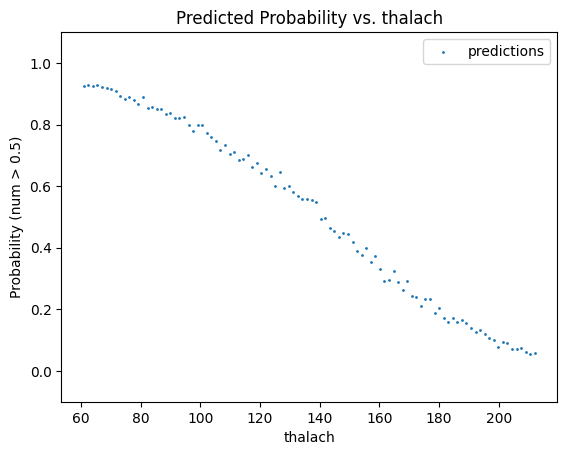

In [ ]:
# Plotting
plt.scatter(x_eval.cpu(), y_prob.cpu(), label="predictions", s=1)
plt.ylim(-0.1, 1.1)
plt.xlabel("thalach")
plt.ylabel("Probability (num > 0.5)")
plt.title("Predicted Probability vs. maximum heart rate achieved")
plt.legend()
plt.show()